### Introduction
## Short description of dataset (Diabetes dataset, 442 samples, 10 features).
## Goal: Predict diabetes disease progression using regression models.

## Import Libraries & Load Dataset

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score 
import warnings
warnings.filterwarnings('ignore')

### Exploratory data analysis(EDA)

In [171]:
data=load_diabetes()

In [172]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [173]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

### Data Preprocessing

In [174]:
x_new=pd.DataFrame(data.data,columns=data.feature_names)
y=pd.Series(data.target)

In [175]:
x_new

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [176]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Length: 442, dtype: float64

In [177]:
x_new.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

## Train Test Split

In [178]:
x_new_train,x_new_test,y_train,y_test=train_test_split(x_new,y,test_size=0.3,random_state=42)

### Feature scaling

In [179]:
scaler_std = StandardScaler()
x_new_train = scaler_std.fit_transform(x_new_train)
x_new_test=scaler_std.fit_transform(x_new_test)

In [180]:
print("Standardized:", X_std[0])

Standardized: [ 0.80050009  1.06548848  1.29708846  0.45984057 -0.92974581 -0.73206462
 -0.91245053 -0.05449919  0.41853093 -0.37098854]


In [181]:
x_new

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


## Model Training

In [182]:
diabetes=LinearRegression()

### Cross Validation

In [183]:
k = 5
cv_scores = cross_val_score(diabetes, x_new, y, cv=k)

In [184]:
print(cv_scores)

[0.42955615 0.52259939 0.48268054 0.42649776 0.55024834]


### K fold validation

In [185]:
print("K-Fold Cross-Validation Results:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.2f}")

K-Fold Cross-Validation Results:
Fold 1: 0.43
Fold 2: 0.52
Fold 3: 0.48
Fold 4: 0.43
Fold 5: 0.55


## Model Training

In [186]:
diabetes.fit(x_new_train,y_train)

LinearRegression()

In [187]:
y_pred=diabetes.predict(x_new_test)

### evaluate the mmodel using regression metrics

In [188]:
mse=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
mae=mean_absolute_error(y_pred,y_test)
print(f'mse:{mse:.2f}')
print(f'r2:{r2:.2f}')
print(f'mae:{mae:.2f}')

mse:2872.01
r2:0.12
mae:42.42


## Model training 

In [189]:
ridge = Ridge(alpha=0.01)   # alpha = regularization strength
ridge.fit(x_new_train, y_train)

y_pred_ridge = ridge.predict(x_new_test)

print("📌 Ridge Regression")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("R²:", r2_score(y_test, y_pred_ridge))


📌 Ridge Regression
MSE: 2871.8739901999925
MAE: 42.42253013566612
R²: 0.4680047679985009


###Model Training

In [190]:
lasso = Lasso(alpha=0.01)   # alpha zyada bada hoga to features zero kar dega
lasso.fit(x_new_train, y_train)

y_pred_lasso = lasso.predict(x_new_test)

print("\n📌 Lasso Regression")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("R²:", r2_score(y_test, y_pred_lasso))



📌 Lasso Regression
MSE: 2870.2568501993137
MAE: 42.40993070244521
R²: 0.4683043322456705


## Hyperparameters

In [191]:
param_grid={'alpha':[0.001,0.01,0.1,1,10,100]}
lasso=Lasso()
gridsearch=GridSearchCV(lasso,param_grid=param_grid,cv=5,scoring='r2')
gridsearch.fit(x_new_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2')

## Best parameters

In [192]:
best_params=gridsearch.best_params_

In [193]:
best_params

{'alpha': 0.1}

In [194]:
best_diabetes=Ridge(**best_params)
best_diabetes.fit(x_new_train,y_train)

Ridge(alpha=0.1)

In [195]:
y_pred_tuned = best_diabetes.predict(x_new_test)

In [196]:
r2_tuned = r2_score(y_test, y_pred_tuned)
print("\nGrid Search Results:")
print(f"Best Hyperparameters: {best_params}")
print(f"Test Set score with Tuned Model: {r2_tuned:.2f}")


Grid Search Results:
Best Hyperparameters: {'alpha': 0.1}
Test Set score with Tuned Model: 0.47


In [197]:
from sklearn.ensemble import RandomForestRegressor

## Model Training

In [198]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_new_train, y_train)

RandomForestRegressor(random_state=42)

In [199]:
y_pred = rf_model.predict(x_new_test)

#Model Evaluation

In [200]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(f'mse:{mse:.2f}')
print(f'r2:{r2:.2f}')
print(f'mae:{mae:.2f}')

mse:2970.53
r2:0.45
mae:42.80


### Best Fit line graph model prediction 

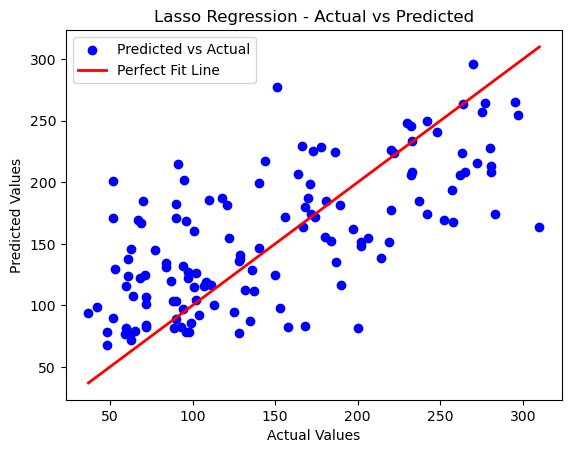

In [201]:
plt.scatter(y_test, y_pred, color="blue", alpha=1, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2, label="Perfect Fit Line")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression - Actual vs Predicted")
plt.legend()
plt.show()

## Conclusion

- **Best model** is the one with the highest test R².In this lasso is the best Model
- **Interpretation**: On this dataset, simple linear models often perform reasonably; Ridge/Lasso can help with stability and shrinkage.  
- **R²** indicates how much variance in the disease progression is explained by features. Values around ~0.40–0.55 are typical on this dataset for linear families (exact numbers depend on split and scaling).  